In [1]:
from google.colab import files
uploaded = files.upload()

Saving Position_Salaries.csv to Position_Salaries.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


##We do our data preprocessing

In [4]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values
#The .values prints it out in numpy array.
#Since there is 1-1 correspondence between position and level, we dont need to encode it,we are using only level

In [5]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [6]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

##Since we are not splitting we train the data set

In [13]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)#n_estimator is the number of tree 10>
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

##We predict 

In [14]:
y_pred = regressor.predict([[6.5]])
y_pred

array([167000.])

##Visualization in high dimension

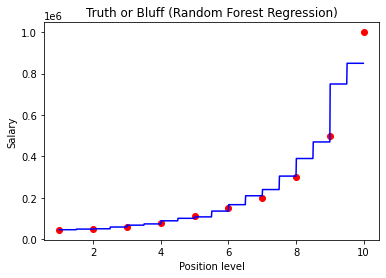

In [15]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()